# Styling Custom Plot Settings 

In [1]:
import pandas as pd
import lux

In [2]:
# Collecting basic usage statistics for Lux (For more information, see: https://tinyurl.com/logging-consent)
lux.logger = True # Remove this line if you do not want your interactions recorded

In [3]:
df = pd.read_csv("../data/car.csv")
df["Year"] = pd.to_datetime(df["Year"], format='%Y') # change pandas dtype for the column "Year" to datetype
lux.config.default_display="lux"

In the last tutorial, we saw how `Vis` objects could be exported into visualization code for further editing. What if we want to change the chart settings for *all* the visualizations displayed in the widget. In Lux, we can change the chart settings and aesthetics by inputting custom plot settings the `plotting_style` property of the dataframe.

### Example #1 : Changing Color and Title of all charts

Here, we've loaded in the [Cars dataset](http://lib.stat.cmu.edu/datasets/) and the visualizations recommended in the widget are in its default settings.

In [4]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

By default, visualizations in Lux are rendered using the [Altair](https://altair-viz.github.io/index.html) library.
To change the plot configuration in Altair, we need to specify a function that takes an [AltairChart](https://altair-viz.github.io/user_guide/generated/toplevel/altair.Chart.html?highlight=chart) as input, performs some chart configurations in Altair, and returns the chart object as an output.

Let's say that we want to change all the graphical marks of the charts to green and add a custom title. We can define this `change_color_add_title` function, which configures the chart's mark as green and adds a custom title to the chart.

In [5]:
def change_color_add_title(chart):
    chart = chart.configure_mark(color="green") # change mark color to green
    chart.title = "Custom Title" # add title to chart
    return chart

In [6]:
lux.config.plotting_style = change_color_add_title

Matplotlib also supports plot configurations to be applied on top of the generated graphs. To set a default plot configuration, first write a function that can take in a `fig` and `ax` and returns a `fig` and `ax`. 


In [7]:
lux.config.plotting_backend = "matplotlib"

`fig` handles figure width and other plot size attributes. `ax` supports changing the chart title and other plot labels and configurations. For example:

In [8]:
def change_width_add_title(fig, ax):
    fig.set_figwidth(7)
    ax.set_title("Custom Title")
    return fig, ax

In [9]:
lux.config.plotting_style = change_width_add_title

Moreover, we can set the color and other figure styles using the rcParams attribute of pyplot.

In [10]:
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['axes.prop_cycle'] = matplotlib.cycler(color='g')

We now see that the displayed visualizations adopt these new imported settings once we force lux to recompute its recommendations. 

*Note: currently, if we want these plot configurations to show up on a DataFrame already loaded, we must also add `df.expire_recs()`*

In [11]:
df.expire_recs()
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

If we click on the visualization for `Displacement` v.s. `Weight` and export it. We see that the exported chart now contains code with these additional plot settings at the every end.

In [14]:
# Before running this cell, click on Displacement v.s. Weight vis and export it.
vis = df.exported[0]
print (vis.to_altair())

AttributeError: 'Vis' object has no attribute 'to_altair'

In [15]:
import altair as alt

chart = alt.Chart(df).mark_circle().encode(
    x=alt.X('Weight',scale=alt.Scale(domain=(1613, 5140)),type='quantitative'),
    y=alt.Y('Displacement',scale=alt.Scale(domain=(68.0, 455.0)),type='quantitative')
)
chart = chart.configure_mark(tooltip=alt.TooltipContent('encoding')) # Setting tooltip as non-null
chart = chart.interactive() # Enable Zooming and Panning
chart = chart.configure_title(fontWeight=500,fontSize=13,font='Helvetica Neue')
chart = chart.configure_axis(titleFontWeight=500,titleFontSize=11,titleFont='Helvetica Neue',
			labelFontWeight=400,labelFontSize=8,labelFont='Helvetica Neue',labelColor='#505050')
chart = chart.configure_legend(titleFontWeight=500,titleFontSize=10,titleFont='Helvetica Neue',
			labelFontWeight=400,labelFontSize=8,labelFont='Helvetica Neue')
chart = chart.properties(width=160,height=150)
chart = chart.configure_mark(color="green") # change mark color to green
chart.title = "Custom Title" # add title to chart
chart

alt.Chart(...)

We can also export these Matplotlib charts with the plotting style.

In [16]:
# Before running this cell, click on Displacement v.s. Weight vis and export it.
vis = df.exported[0]
print (vis.to_matplotlib())

{'config': 'iVBORw0KGgoAAAANSUhEUgAAAfgAAAEgCAYAAABYRWE9AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAABjp0lEQVR4nO29e3zcV3Xo+13zHj1mJFuyZUuRHfkdGxMnDjgJSUwgBVoawKTnntNTaEhaCjkutDRNuXBpXUJyT1O3pacu4XFuGnKAy+GmJgktoZBSJ0AcsPOS7fgVy7Ys+SHJHs3oMe/Z94/fzHg0Gj1Go9eM19ef+Wjmt/dv77V+v/Gs39577bXEGIOiKIqiKJWFba4FUBRFURRl+lEDryiKoigViBp4RVEURalA1MAriqIoSgWiBl5RFEVRKhA18IqiKIpSgaiBVxRFUZQKRA28oiiKolQgauAVRVEUpQJRA68oiqIoFYgaeEWZB4jITSLyXRHpEpGoiJwTkf8QkU+IiH2G+vwjEdkhInfPRPtTQUROiYiZxGuriNyd+zmnjR3p1wcLtJ+p//jsaaUoc4NjrgVQlCsdEfkC8JeA5BxuSr+2At8F+meg6z8ClgHPA4/PQPtzxV+k/34TeGoO5VCUOUVH8Ioyh4jIh4EvYhn3HuDDQDVQB9wJvDhnws0Bxpjlxhgxxgjwzpyib2aOp197jDGP536eI5EVZd6iBl5R5pY/z3n/u8aY3caYYWNM0BjzA+AdQBBGTF/vyZyQnqrOTDvfnXP8PhF5TURCIjIkIidE5Hsisl5ElouIwRq9A9yW08aOnDbuFpFfpc8fFpH9IvKxXOFF5PGcc68XkX0iEhaRn4nIynRfP063cUBEfm26Llz+FH3mWuRez0LXZoy2fltE9orIYFr+X4nI/zFdsirKXKBT9IoyR4hIE7Ax/fGoMeZH+XXMFPI5pw3TP+Ydbku/vgfsn0QbfwU8kHf4euAxEVlr

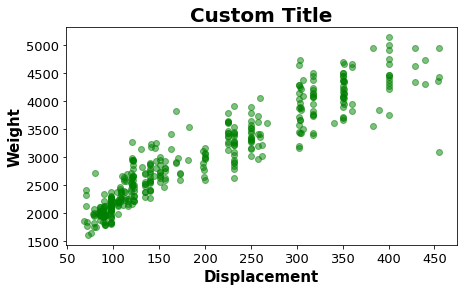

In [17]:
import matplotlib.pyplot as plt
plt.rcParams.update(
            {
                "axes.titlesize": 20,
                "axes.titleweight": "bold",
                "axes.labelweight": "bold",
                "axes.labelsize": 16,
                "legend.fontsize": 14,
                "legend.title_fontsize": 15,
                "xtick.labelsize": 13,
                "ytick.labelsize": 13,
            }
        )
import numpy as np
from math import nan
from matplotlib.cm import ScalarMappable
fig, ax = plt.subplots(figsize=(4.5, 4))
x_pts = df['Displacement']
y_pts = df['Weight']
ax.scatter(x_pts, y_pts, alpha=0.5)
ax.set_xlabel('Displacement', fontsize='15')
ax.set_ylabel('Weight', fontsize='15')
fig.set_figwidth(7)
ax.set_title("Custom Title")
fig

### Example #2: Changing Selected Chart Setting

Next, we look at an example of customizing the chart setting for only selected sets of visualizations. 

Here, we load in the [Olympics dataset](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) and see that the recommended visualization is cluttered with many datapoints.

In [18]:
url = 'https://github.com/lux-org/lux-datasets/blob/master/data/olympic.csv?raw=true'
df = pd.read_csv(url)
df["Year"] = pd.to_datetime(df["Year"], format='%Y') # change pandas dtype for the column "Year" to datetype
lux.config.default_display="lux"
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

We want to decrease the opacity of scatterplots, but keep the opacity for the other types of visualization as default.

In [19]:
def changeOpacityScatterOnly(chart):
    chart = chart.configure_circle(opacity=0.1) # lower opacity if circle
    return chart

In [21]:
lux.config.plotting_style = changeOpacityScatterOnly
df.expire_recs()
df

D:\Users\admin\anaconda3\envs\env1\lib\site-packages\IPython\core\formatters.py:345: UserWarning:
Unexpected error in rendering Lux widget and recommendations. Falling back to Pandas display.
Please report the following issue on Github: https://github.com/lux-org/lux/issues 

D:\Users\admin\anaconda3\envs\env1\lib\site-packages\lux\core\frame.py:700: UserWarning:Traceback (most recent call last):
  File "D:\Users\admin\anaconda3\envs\env1\lib\site-packages\lux\core\frame.py", line 651, in _repr_html_
    self.maintain_recs()
  File "D:\Users\admin\anaconda3\envs\env1\lib\site-packages\lux\core\frame.py", line 493, in maintain_recs
    self._widget = rec_df.render_widget()
  File "D:\Users\admin\anaconda3\envs\env1\lib\site-packages\lux\core\frame.py", line 749, in render_widget
    widgetJSON = self.to_JSON(self._rec_info, input_current_vis=input_current_vis)
  File "D:\Users\admin\anaconda3\envs\env1\lib\site-packages\lux\core\frame.py", line 788, in to_JSON
    recCollection = LuxDat

,Sex,Age,Height,Weight,Year,Season,HostCity,Sport,MedalType,AthleteCountry,HostRegion,AthleteRegion,SportType
0,M,28,168,54.0,1984-01-01,Summer,Los Angeles,Track&Field,Bronze,Others,North America,Africa,Race
1,M,25,176,78.0,1964-01-01,Summer,Tokyo,Rowing,Bronze,Czech Republic,Asia,Europe,Boat
2,F,25,158,48.0,2008-01-01,Summer,Beijing,Judo,Gold,Romania,Asia,Europe,Combat
3,M,19,173,75.0,1968-01-01,Winter,others,Hockey,Bronze,Canada,Europe,North America,Ice
4,M,31,182,90.0,1968-01-01,Summer,Mexico City,Wrestling,Gold,Russia,North America,Europe,Combat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,F,24,164,54.0,1992-01-01,Summer,Barcelona,Others,Bronze,Russia,Europe,Europe,Ball
4996,M,32,183,85.0,1996-01-01,Summer,Atlanta,Others,Gold,Australia,North America,Oceania,Target
4997,M,27,190,70.0,2016-01-01,Summer,Rio de Janeiro,Fencing,Silver,Italy,South America,Europe,Combat
4998,F,19,170,61.0,2008-01-01,Summer,Beijing,Hockey,Gold,Netherlands,Asia,Europe,Ball


We can modify the scatterplot setting, without changing the settings for the other chart types.